In [64]:
import pandas as pd
import numpy as np
import seaborn as sns

In [45]:
def getData(filename):
    with open(filename,'r') as f:
        data = f.read()
    experiments = data.split("Experiment")[2:]
    return experiments

def get_cpu_total_time(iteration_log):
    return round(float(iteration_log.split("CPU time spent")[1].split("\n\t")[0][6:]),2)
    
def getAverageIterTime(experiment_log):
    '''
    return average time of first iteration and mean afterwards
    '''
    ite_aft = []
    ite_fir = get_cpu_total_time(experiment_log.split('iteration')[1])

    iters_logs = experiment_log.split('iteration')[2:]
    for iters in iters_logs:
        ite_aft.append(get_cpu_total_time(iters))
    return (ite_fir,np.mean(ite_aft))
    
# get average time
def getAveExperiTime(experiments,isWC):
    cpu_times = []
    for i in range(len(experiments)):

        try:
            if isWC:
                cpu_times.append(get_cpu_total_time(experiments[i]))
            else: 
                cpu_times.append(getAverageIterTime(experiments[i]))
        except:
            continue
        # return average s instead of milisecond
    return np.mean(cpu_times,axis=0)/1000

# read data from wordcount job

def getWCStat(filename,nodes,WC):
    experiments = getData(filename) 
    res = getAveExperiTime(experiments,WC)
    if WC:
        print(f'Average running time of wordcount in {nodes} nodes is {res}')
    else:
        print(f'Average running time of Kmeans in {nodes} nodes is {res}')
    return res

In [99]:

# Wordcount
WC2N = getWCStat('WC_2N.txt',2,True) 
WC4N = getWCStat('WC_4N.txt',4,True) 
WC8N = getWCStat('WC_8N.txt',8,True) 

#hadoop
KM2N = getWCStat('hadoopKM30_10_2N.txt',2,False)
KM4N = getWCStat('hadoopKM30_10_4N.txt',4,False)
KM8N = getWCStat('hadoopKM30_10_8N.txt',8,False)


Average running time of wordcount in 2 nodes is 411.7565517241379
Average running time of wordcount in 4 nodes is 406.91
Average running time of wordcount in 8 nodes is 391.76689655172413
Average running time of Kmeans in 2 nodes is [304.39       288.81666667]
Average running time of Kmeans in 4 nodes is [278.18666667 267.65407407]
Average running time of Kmeans in 8 nodes is [311.91       294.43611111]


In [117]:
#################### plot
def drawPlot(dataset,x,y,ifHue,z,x_label,y_label,img_name):
    sns.set_theme(style="whitegrid")
    if ifHue:
        g = sns.catplot(
            data=dataset, kind="bar",
            x=x, y=y, hue=z,
            errorbar="sd",palette="dark", alpha=.6, height=6,
        )
    else:
        g = sns.catplot(
            data=dataset, kind="bar",
            x=x, y=y, col=z,
            errorbar="sd",palette="dark", alpha=.6, height=6
        )
    g.despine(left=True)
    g.set_axis_labels(x_label, y_label)
    g.savefig(img_name)

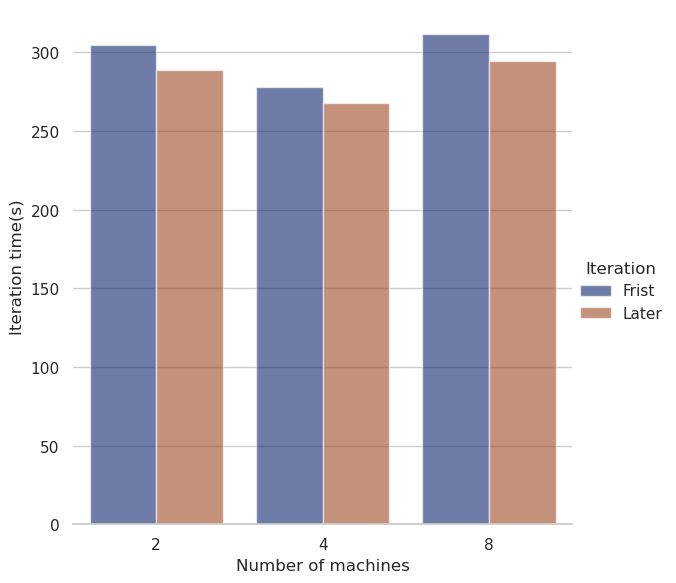

In [122]:
# WC experiment
# dataset = pd.DataFrame({'Platform': ['hadoop', 'hadoop','hadoop','Spark','Spark','Spark'], 'Iteration Time': [WC2N, WC4N,WC8N,80, 70,70], 'Nodes':[2,4,8,2,4,8]})
# drawPlot(dataset,"Nodes","Iteration Time",True,"Platform","Number of machines","Iteration time(s)", 'Nodes_comp1.png')

# WC efficiency score
# dataset = pd.DataFrame({'Platform': ['Spark','Spark','Spark'], 'Effi': [30.5,15.1,9.7], 'Nodes':[2,4,8]})
# drawPlot(dataset,x="Nodes", y="Effi", False, "Platform","Number of machines", "Efficiency Score(%)", 'EFF_SCO.png')

# KM total experiment
# dataset = pd.DataFrame({'Platform': ['hadoop', 'hadoop','hadoop','Spark','Spark','Spark'], 'Iteration Time': [np.mean(WC2N), np.mean(WC4N),np.mean(WC8N),85,53,40], 'Nodes':[2,4,8,2,4,8]})
# drawPlot(dataset,"Nodes","Iteration Time",True,"Platform","Number of machines","Iteration time(s)", 'KM.png')

#KM expriment in hadoop among iterations
dataset = pd.DataFrame({'Iteration': ['Frist', 'Frist','Frist','Later','Later','Later'], 'Iteration Time': [KM2N[0],KM4N[0],KM8N[0],KM2N[1],KM4N[1],KM8N[1]], 'Nodes':[2,4,8,2,4,8]})
drawPlot(dataset,"Nodes","Iteration Time",True,"Iteration","Number of machines","Iteration time(s)", 'Nodes_ITER_KM.png')

# KM efficiency score
# dataset = pd.DataFrame({'Platform': ['Spark','Spark','Spark'], 'Effi': [79.4,57.3,21.2], 'Nodes':[2,4,8]})
# drawPlot(dataset,x="Nodes", y="Effi", ifHue = False,z="Platform",x_label="Number of machines", y_label="Efficiency Score(%)", img_name='EFF_SCO_KM.png')
